# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [161]:
# Resolver acá
import pandas as pd
import os # Exportamos este módulo para trabajar con carpetas
import csv

#Cargamos el archivo desde el directorio del GitHub
base_dir = os.getcwd() # Construye la ruta relativa al archivo CSV desde el directorio actual
csv_path = os.path.join(base_dir, 'Base Airbnb NY.csv')

df_airbnb = pd.read_csv(csv_path)

#Eliminamos valores duplicados y columnas que no son de interés
df_airbnb.drop_duplicates(inplace=True)
df_airbnb=df_airbnb.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review'])
df_airbnb.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365


In [162]:
#buscamos missing values
print(df_airbnb.isnull().sum())

#cambiamos los missing values por la mediana (para más información ver informe)
df_airbnb.fillna(df_airbnb.select_dtypes(include=['number']).median(), inplace=True) 
print(df_airbnb.isnull().sum()) #Nos aseguramos de que no queden missing values

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [163]:
#Encontrar outliers: uso IQR

import numpy as np 

#Obtengo las columnas numéricas del dataframe
col_numericas = df_airbnb.select_dtypes(include=[np.number]).columns
print("Columnas numéricas:", col_numericas)

#creo un diccionario para almacenar los outliers
outliers={}

for col in col_numericas:
    Q1 = df_airbnb[col].quantile(0.25) #calcula el primer cuantil de la columna que está iterando 
    Q3 = df_airbnb[col].quantile(0.75) #calcula el tercer cuantil de la columna que está iterando
    IQR = Q3 - Q1
    
    lim_inferior = Q1 - 1.5 * IQR #esta es una definición genérica de un outlier. Los valores que están fuera de esos límites son outliers
    lim_superior = Q3 + 1.5 * IQR
    
    # Filtrar los outliers
    datos_outliers = df_airbnb[(df_airbnb[col] < lim_inferior) | (df_airbnb[col] > lim_superior)][col]
    
    #guardar outliers en el diccionario
    outliers[col]=datos_outliers

for col,out in outliers.items():
    print(f"Outliers para la columna '{col}':")
    print(out)
    print('\n')

Columnas numéricas: Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Outliers para la columna 'latitude':
261      40.88057
433      40.89747
737      40.89557
966      40.87991
1010     40.57810
           ...   
48441    40.56506
48516    40.57936
48699    40.57531
48751    40.56546
48799    40.54179
Name: latitude, Length: 425, dtype: float64


Outliers para la columna 'longitude':
143     -73.83168
169     -74.08088
196     -73.76597
249     -74.08537
250     -74.08543
           ...   
48847   -73.86523
48851   -73.86591
48858   -73.82556
48866   -73.81448
48889   -73.80844
Name: longitude, Length: 2833, dtype: float64


Outliers para la columna 'price':
61       375.0
85       800.0
103      500.0
114      350.0
121      400.0
         ...  
48758    350.0
48833    475.0
48839    800.0
48842    350.0
48856    345.0
Name: price, Length: 297

In [164]:
#Eliminamos outliers insignificantes (ver informe)
df_airbnb = df_airbnb[df_airbnb['availability_365'] != -999] 


In [165]:
#Agrupamos por barrio con merge y agregamos la columna offer group
offer_counts = df_airbnb.groupby('neighbourhood_group').size().reset_index(name='offer_count')

# 2. Realizar un merge para añadir la columna 'offer group' al DataFrame original
df_airbnb = df_airbnb.merge(offer_counts, on='neighbourhood_group', how='left')

# Renombrar la columna a 'offer group' para claridad
df_airbnb.rename(columns={'offer_count': 'offer_group'}, inplace=True)

# Mostrar el DataFrame con la nueva columna
df_airbnb.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,offer_group
0,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365,20096
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355,21659
2,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,0.72,1,365,21659
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194,20096
4,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0,21659


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [166]:
# Aplicar codificación one-hot para neighbourhood_group y room_type

df_airbnb = pd.get_dummies(df_airbnb, columns=['neighbourhood_group', 'room_type'])
# Incluimos las variables categóricas como dummies para poder interpretar la matriz y evitar que el número les asigne un orden 

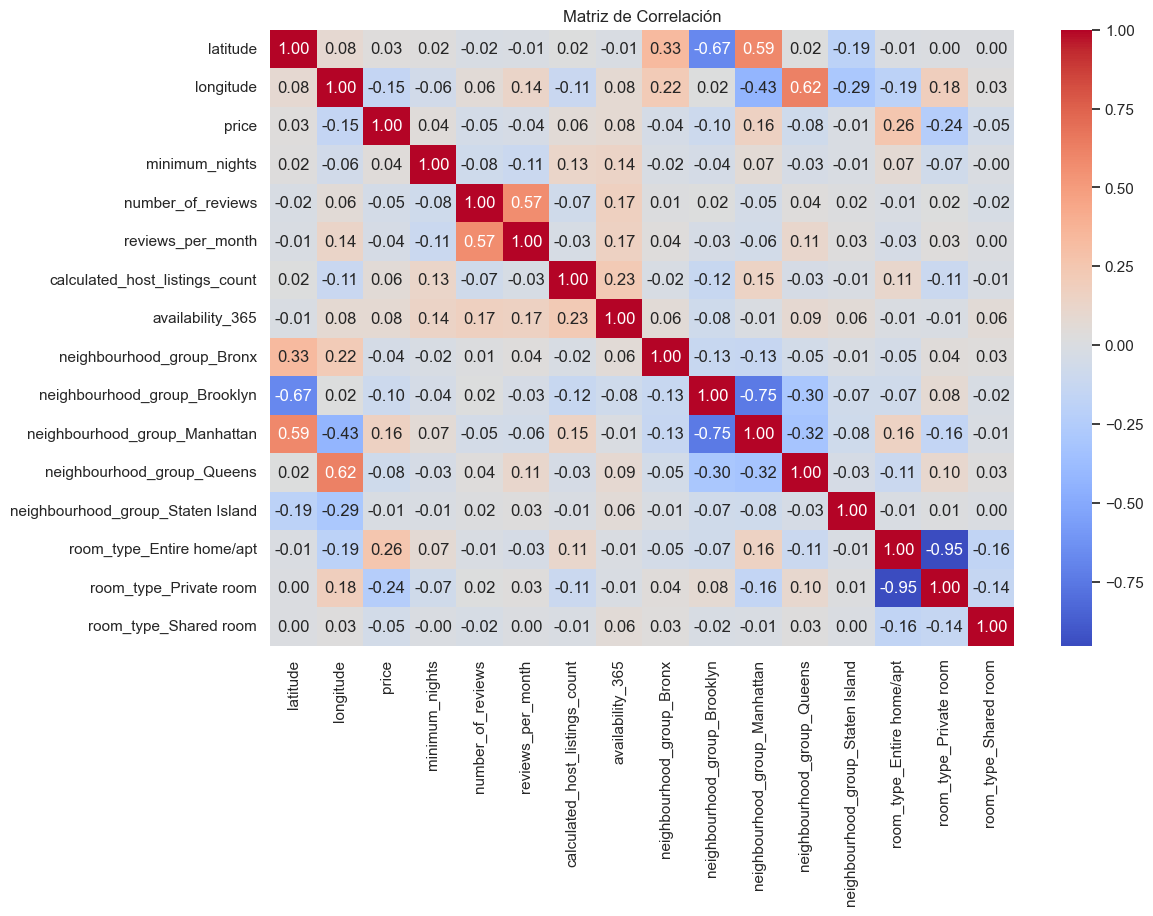

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df_airbnb.loc[:, df_airbnb.columns != 'offer_group'].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

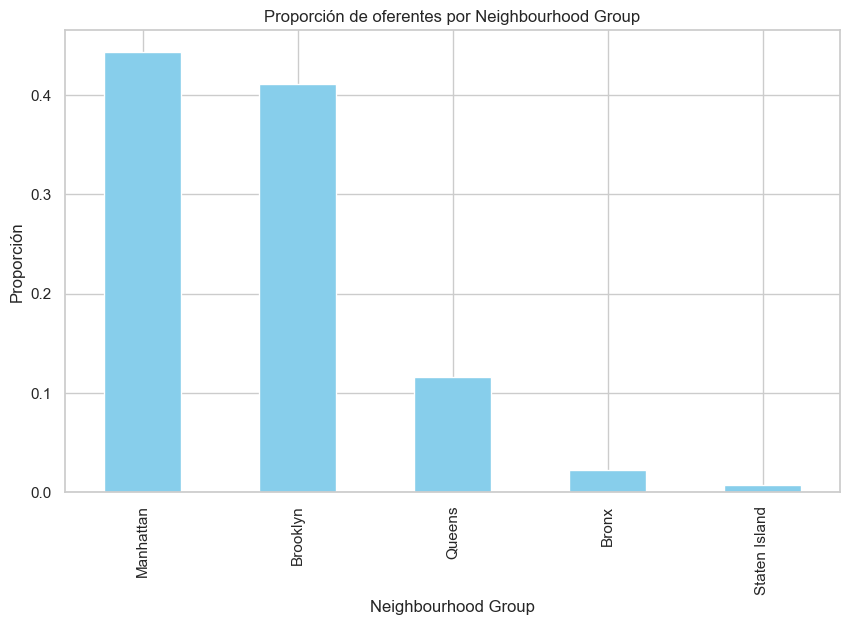

Proporción de oferentes por Neighbourhood Group:
neighbourhood_group
Manhattan        0.443063
Brooklyn         0.411144
Queens           0.115857
Bronx            0.022309
Staten Island    0.007627
Name: proportion, dtype: float64


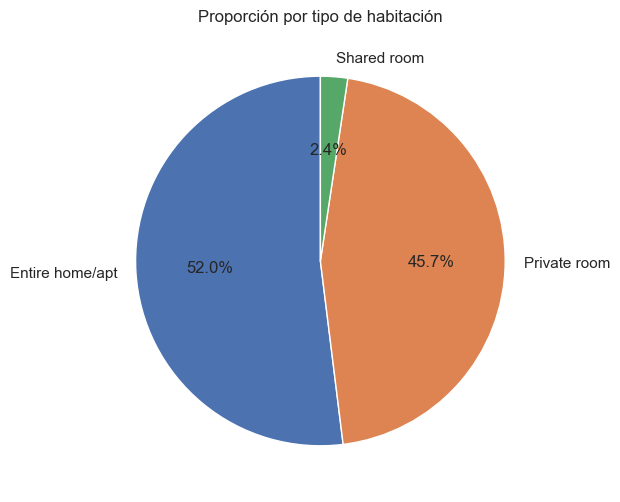

In [168]:
# Resolver acá

import matplotlib.pyplot as plt

# Vuelvo a cargar el archivo CSV
df_graficos = pd.read_csv(csv_path)

# Proporcion de oferentes por "neighbourhood_group"
proporcion_neighbourhood_group = df_graficos['neighbourhood_group'].value_counts(normalize=True)

# Proporcion de oferentes por tipo de habitacion
proporcion_room_type = df_graficos['room_type'].value_counts(normalize=True)

# Graficar proporciones de "neighbourhood_group"
plt.figure(figsize=(10, 6))
proporcion_neighbourhood_group.plot(kind='bar', color='skyblue')
plt.title('Proporción de oferentes por Neighbourhood Group')
plt.ylabel('Proporción')
plt.xlabel('Neighbourhood Group')
plt.grid(True)
plt.show()


proporcion_hab=df_graficos['room_type'].value_counts(normalize=True)*100
fig,ax=plt.subplots(figsize=(8,6))
ax.pie(proporcion_hab, labels= proporcion_hab.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Proporción por tipo de habitación')

# Mostrar las proporciones en formato de tabla
print("Proporción de oferentes por Neighbourhood Group:")
print(proporcion_neighbourhood_group)



#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

Precio Mínimo: $0.0
Precio Máximo: $10000.0
Precio Promedio: $152.73

Media de precio por Neighbourhood Group:
neighbourhood_group
Bronx             87.464646
Brooklyn         124.380597
Manhattan        196.862352
Queens            99.536900
Staten Island    114.812332
Name: price, dtype: float64

Media de precio por Tipo de Habitación:
room_type
Entire home/apt    211.788107
Private room        89.783388
Shared room         70.127586
Name: price, dtype: float64
Número de bins (Regla de Rice): 73


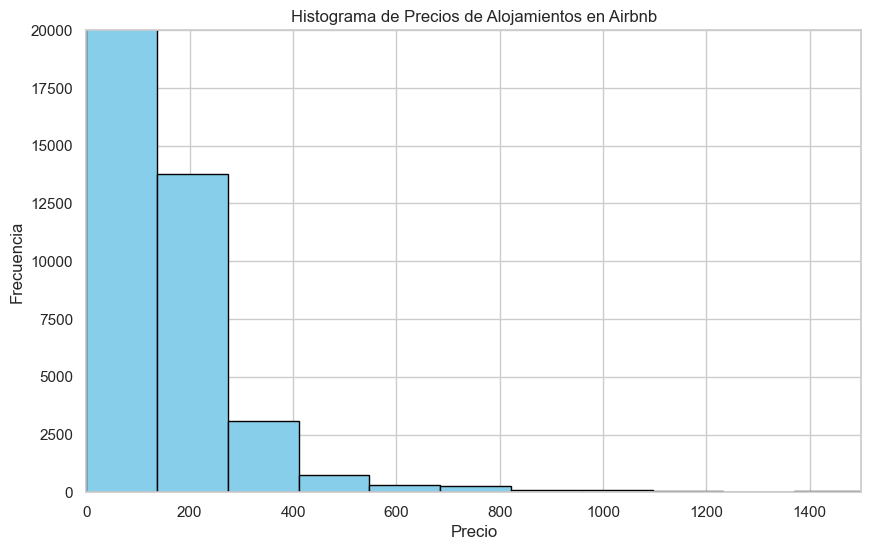

In [169]:
# Resolver acá


# Precio minimo, maximo y promedio
precio_min = df_airbnb['price'].min()
precio_max = df_airbnb['price'].max()
precio_prom = df_airbnb['price'].mean()

print(f"Precio Mínimo: ${precio_min}")
print(f"Precio Máximo: ${precio_max}")
print(f"Precio Promedio: ${precio_prom:.2f}")

# Media precio por "Neighbourhood group"
media_precio_neighbourhood = df_graficos.groupby('neighbourhood_group')['price'].mean()

# Media precio por tipo de habitación
media_precio_room_type = df_graficos.groupby('room_type')['price'].mean()

# Mostrar resultados
print("\nMedia de precio por Neighbourhood Group:")
print(media_precio_neighbourhood)

print("\nMedia de precio por Tipo de Habitación:")
print(media_precio_room_type)

#--------------------------------------------------------------------------
#Calculamos la cantidad de bins para poder interpretar bien el histograma. Ver informe 
Q1 = df_airbnb['price'].quantile(0.25)
Q3 = df_airbnb['price'].quantile(0.75)

# Calcular IQR
IQR = Q3 - Q1
n = 48880

# Regla de Rice
k_rice = int(2 * (n ** (1/3)))
print(f"Número de bins (Regla de Rice): {k_rice}") #devuelve 73


# Histograma de precios de los alojamientos
plt.figure(figsize=(10, 6))
plt.hist(df_airbnb['price'], bins=k_rice, color='skyblue', edgecolor='black')
plt.title('Histograma de Precios de Alojamientos en Airbnb')
plt.xlim(0, 1500)  # Limitar el eje x de 0 a 365 días
plt.ylim(0, 20000)  # Ajustar el eje y según el máximo de reseñas
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

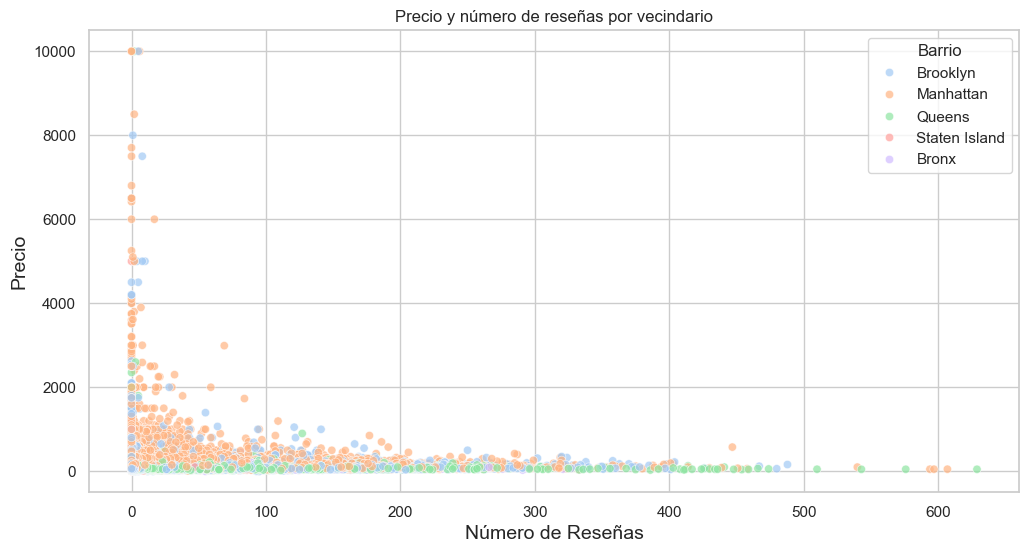

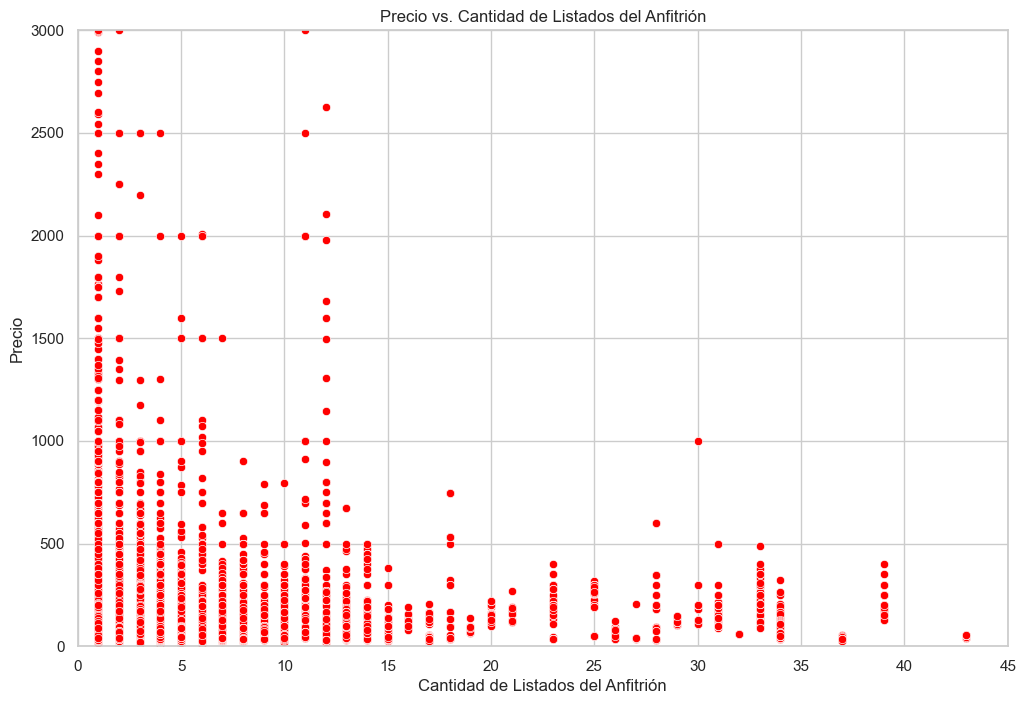

In [170]:
#comentarios sobre los scatter plots en el informe

# Scatter Plot 1: Precio vs Número de Reseñas por Vecindario
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_graficos, x='number_of_reviews', y='price', hue='neighbourhood_group',palette= 'pastel',  alpha=0.7)

plt.title('Precio y número de reseñas por vecindario')
plt.xlabel('Número de Reseñas', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.legend(title='Barrio', loc='upper right')
plt.grid(True)
plt.show()

# Scatter Plot 2: Precio vs Cantidad de listados del anfitrión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_airbnb, x='calculated_host_listings_count', y='price', color='red')

plt.title('Precio vs. Cantidad de Listados del Anfitrión')
plt.xlabel('Cantidad de Listados del Anfitrión')
plt.ylabel('Precio')
plt.xlim(0, 45)  # Ajusta según el rango de tus datos
plt.ylim(0, 3000)  # Ajusta según el rango de tus datos

plt.show()

In [171]:
df_airbnb


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,offer_group,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149.0,1,9,0.21,6,365,20096,False,True,False,False,False,False,True,False
1,40.75362,-73.98377,225.0,1,45,0.38,2,355,21659,False,False,True,False,False,True,False,False
2,40.80902,-73.94190,150.0,3,0,0.72,1,365,21659,False,False,True,False,False,False,True,False
3,40.68514,-73.95976,89.0,1,270,4.64,1,194,20096,False,True,False,False,False,True,False,False
4,40.79851,-73.94399,80.0,10,9,0.10,1,0,21659,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48875,40.67853,-73.94995,70.0,2,0,0.72,2,9,20096,False,True,False,False,False,False,True,False
48876,40.70184,-73.93317,40.0,4,0,0.72,2,36,20096,False,True,False,False,False,False,True,False
48877,40.81475,-73.94867,115.0,10,0,0.72,1,27,21659,False,False,True,False,False,True,False,False
48878,40.75751,-73.99112,55.0,1,0,0.72,6,2,21659,False,False,True,False,False,False,False,True


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extraer las variables numéricas
numerical_features = ['latitude', 'longitude', 'price', 'minimum_nights',
                      'number_of_reviews', 'reviews_per_month',
                      'calculated_host_listings_count', 'availability_365',
                      'offer_group']

X = df_airbnb[numerical_features]

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los resultados del PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])




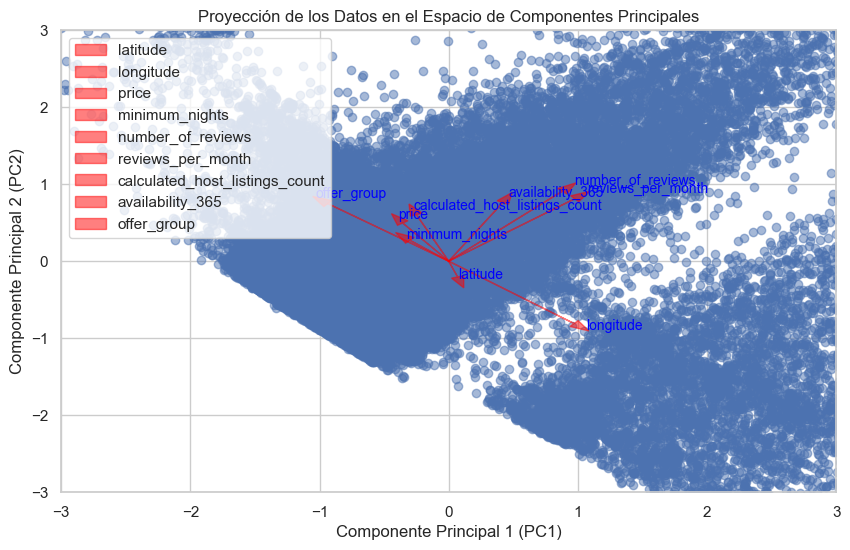

In [178]:
# Obtener la matriz de componentes
components = pca.components_

scaling_factor = 2  # Ajusta este factor según sea necesario

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)

# Etiquetas de los ejes
plt.title('Proyección de los Datos en el Espacio de Componentes Principales')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)

# Añadir los vectores de las variables originales
for i, feature in enumerate(numerical_features):
    plt.arrow(0, 0, components[0, i] * scaling_factor, components[1, i] * scaling_factor,
              color='red', alpha=0.5,
              head_width=0.1,
              label=feature)

    # Añadir etiquetas cerca de la punta del vector
    plt.text(components[0, i] * scaling_factor * 1.1,
             components[1, i] * scaling_factor * 1.1,
             feature, color='blue', fontsize=10)

# Mostrar el gráfico
plt.legend(loc='upper left')
plt.xlim(-3, 3)  # Ajusta los límites de los ejes según tus datos
plt.ylim(-3, 3)  # Ajusta los límites de los ejes según tus datos
plt.show()

Porcentaje de varianza explicada por los dos primeros componentes: 37.30%


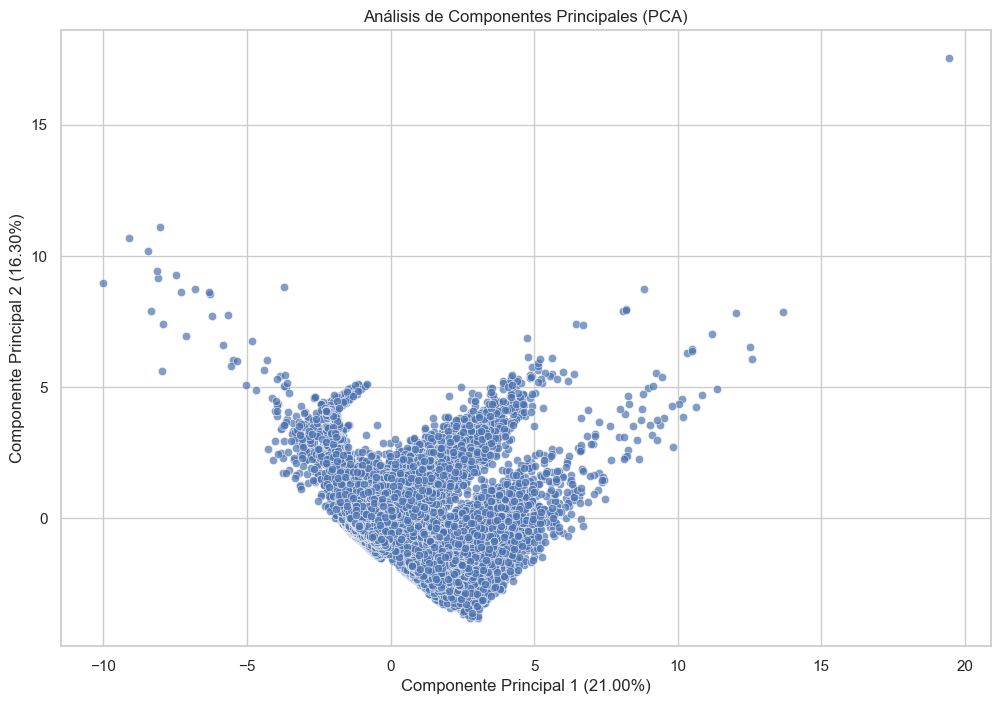

Loadings:
                                      PC1       PC2
latitude                        0.047341 -0.123875
longitude                       0.666863 -0.490461
price                          -0.244506  0.299837
minimum_nights                 -0.206265  0.164297
number_of_reviews               0.604410  0.550306
reviews_per_month               0.670381  0.490888
calculated_host_listings_count -0.171767  0.365737
availability_365                0.287561  0.460552
offer_group                    -0.643167  0.452716


In [179]:
explained_variance = pca.explained_variance_ratio_
print(f"Porcentaje de varianza explicada por los dos primeros componentes: {explained_variance.sum() * 100:.2f}%")

# Gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', alpha=0.7)
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel(f'Componente Principal 1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'Componente Principal 2 ({explained_variance[1]*100:.2f}%)')
plt.grid(True)
plt.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=numerical_features, columns=['PC1', 'PC2'])
print("Loadings:\n", loadings_df)

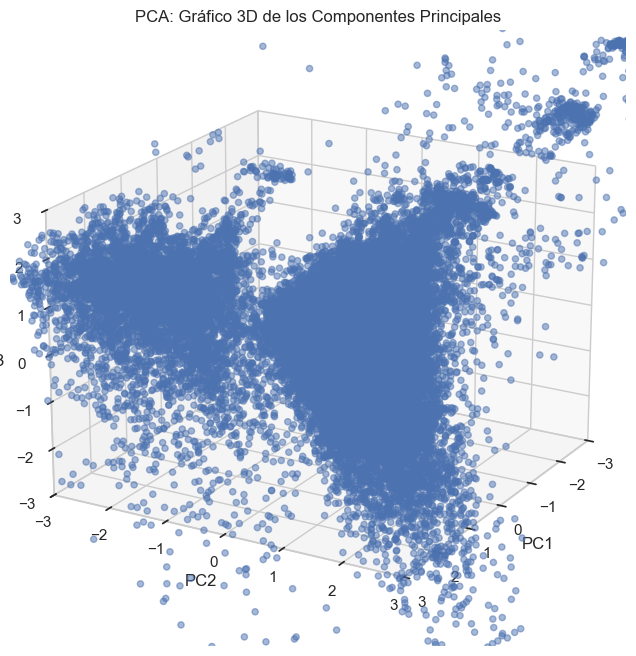

In [180]:
#gráfico en 3D
umerical_features = ['latitude', 'longitude', 'price', 'minimum_nights',
                      'number_of_reviews', 'reviews_per_month',
                      'calculated_host_listings_count', 'availability_365',
                      'offer_group']

X = df_airbnb[numerical_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Crear un DataFrame con los resultados del PCA
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA: Gráfico 3D de los Componentes Principales')

# Ajustar los límites de los ejes
ax.set_xlim(-3, 3)  # Cambia estos valores según tu rango de datos
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

# Cambiar el ángulo de visión
ax.view_init(elev=20, azim=30)  # Cambia estos valores para ver desde diferentes ángulos

plt.show()

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [174]:
import numpy as np
import pandas as pd

df_airbnb_outliers = df_airbnb.copy()


In [175]:
import numpy as np
import pandas as pd

numeric_cols = df_airbnb_outliers.select_dtypes(include=[np.number]).columns

# Paso 2: Crear un DataFrame vacío para almacenar los outliers
outliers = {}

# Paso 3: Calcular el IQR y los límites para cada columna numérica
for col in numeric_cols:
    Q1 = df_airbnb_outliers[col].quantile(0.25)
    Q3 = df_airbnb_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Límite inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outlier_condition = (df_airbnb_outliers[col] < lower_bound) | (df_airbnb_outliers[col] > upper_bound)

    # Almacenar los outliers
    outliers[col] = df_airbnb_outliers[outlier_condition][col]

    # Reemplazar los outliers por la mediana de la columna
    median_value = df_airbnb_outliers[col].median()
    df_airbnb_outliers.loc[outlier_condition, col] = median_value

# Paso 4: Mostrar los outliers por columna
for col, outlier_data in outliers.items():
    print(f"Outliers en '{col}':")
    print(outlier_data)
    print("\n")

# El DataFrame df_airbnb_outliers ahora tiene outliers reemplazados por la mediana
print("DataFrame con outliers reemplazados por la mediana:")
print(df_airbnb_outliers)

Outliers en 'latitude':
261      40.88057
433      40.89747
737      40.89557
966      40.87991
1010     40.57810
           ...   
48426    40.56506
48501    40.57936
48684    40.57531
48736    40.56546
48784    40.54179
Name: latitude, Length: 424, dtype: float64


Outliers en 'longitude':
143     -73.83168
169     -74.08088
196     -73.76597
249     -74.08537
250     -74.08543
           ...   
48832   -73.86523
48836   -73.86591
48843   -73.82556
48851   -73.81448
48874   -73.80844
Name: longitude, Length: 2831, dtype: float64


Outliers en 'price':
61       375.0
85       800.0
103      500.0
114      350.0
121      400.0
         ...  
48743    350.0
48818    475.0
48824    800.0
48827    350.0
48841    345.0
Name: price, Length: 2972, dtype: float64


Outliers en 'minimum_nights':
6        45
14       90
29       14
36       60
45       29
         ..
48795    30
48828    29
48856    29
48864    20
48867    20
Name: minimum_nights, Length: 6606, dtype: int64


Outliers en 'numbe

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [176]:
# Agregar una columna de unos para el intercepto
from sklearn.model_selection import train_test_split

df_airbnb_outliers['intercept'] = 1
# Definir la variable dependiente (y) y las variables independientes (X)
y = df_airbnb_outliers['price']  # Variable dependiente
X = df_airbnb_outliers.drop(columns=['price'])  # Variables independientes


X = np.hstack((np.ones((X.shape[0], 1)), X))  # Agregamos la columna de unos

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Verificar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ajustar el modelo a los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Resultados del modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")
print(f"R^2: {r2}")

# Comentarios sobre los resultados
if r2 < 0.1:
    print("El modelo no está capturando la varianza en los datos.")
elif r2 < 0.5:
    print("El modelo tiene un ajuste moderado.")
else:
    print("El modelo explica una buena proporción de la varianza en los datos.")

Tamaño del conjunto de entrenamiento: 34216
Tamaño del conjunto de prueba: 14664
Coeficientes: [ 0.00000000e+00  3.21532744e+01 -4.02041128e+02 -1.11989304e+00
 -1.21795000e-01  9.26589261e-01  2.97362111e-01  3.83078152e-02
  1.52630211e-02 -5.30494555e+00  9.77492993e+00  9.76521295e-06
  5.93211279e+00 -1.04021069e+01  5.39994139e+01 -1.53173082e+01
 -3.86821057e+01  0.00000000e+00]
Intercepto: -31268.05897520089
Error Cuadrático Medio: 2563.601886009627
R^2: 0.4209000154952529
El modelo tiene un ajuste moderado.


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

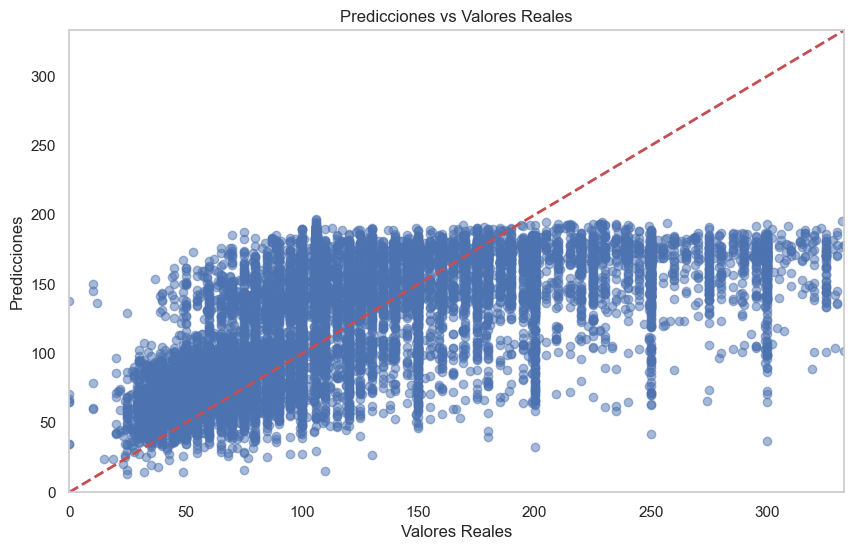

In [177]:
#crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()
